# Librairies

In [2]:
import os
import numpy as np
import pandas as pd
import math
import sys
import itertools
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import set_matplotlib_formats, Image


# statistical modeling libraries
import statsmodels.formula.api as smf
import scipy.stats as scs
import statsmodels.tsa.api as smt
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm


plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['savefig.dpi'] = 120
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['text.usetex'] = False
#plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"
#plt.rcParams['text.latex.preamble'] = b"\usepackage{subdepth}, \usepackage{type1cm}"

# The data 

Data is the raw df. 

In [3]:
data=pd.read_csv("allIWantForXmas.csv",parse_dates=True,index_col=0)

In [4]:
data

,all i want for christmas is you: (Dans tous les pays),all i want: (Dans tous les pays),all i want for: (Dans tous les pays)
Mois,,,
2004-01-01,1,15,3
2004-02-01,< 1,15,1
2004-03-01,1,16,4
2004-04-01,< 1,15,3
2004-05-01,1,15,3
...,...,...,...
2021-07-01,< 1,13,3
2021-08-01,1,14,3
2021-09-01,1,14,4


I took for Google Trends 3 researchs because I doubt that everyone writes all the words to search it ! 
- "all i want for christmas is you", 
- "all i want" ; 
- "all i want for". 

In [5]:
df=data.copy()

## Replace all the <1 by 0. 

In [6]:
df["all i want for christmas is you: (Dans tous les pays)"][1]

'<\xa01'

In [7]:
type(df["all i want for christmas is you: (Dans tous les pays)"][1])

str

The string is not explicitly "< 1" but '<\xa01' .

In [8]:
df.replace("<\xa01",0,inplace=True)

## Convert all string to int

In [9]:
df["all i want for christmas is you: (Dans tous les pays)"]=df["all i want for christmas is you: (Dans tous les pays)"].astype(int)
df["all i want: (Dans tous les pays)"]=df["all i want: (Dans tous les pays)"].astype(int)
df["all i want for: (Dans tous les pays)"]=df["all i want for: (Dans tous les pays)"].astype(int)

## Sum all the columns

In [10]:
df["research"]=df.sum(axis=1)

In [11]:
dfResearch = df.drop(labels=["all i want for christmas is you: (Dans tous les pays)","all i want: (Dans tous les pays)","all i want for: (Dans tous les pays)"],axis=1)

In [12]:
dfResearch

,research
Mois,
2004-01-01,19
2004-02-01,16
2004-03-01,21
2004-04-01,18
2004-05-01,19
...,...
2021-07-01,16
2021-08-01,18
2021-09-01,19


## Check if we have to correct date time type

In [13]:
dfResearch.index[0]

Timestamp('2004-01-01 00:00:00')

In [14]:
dfClean=dfResearch.rename(columns={"Mois":"month"})

## Plot the data

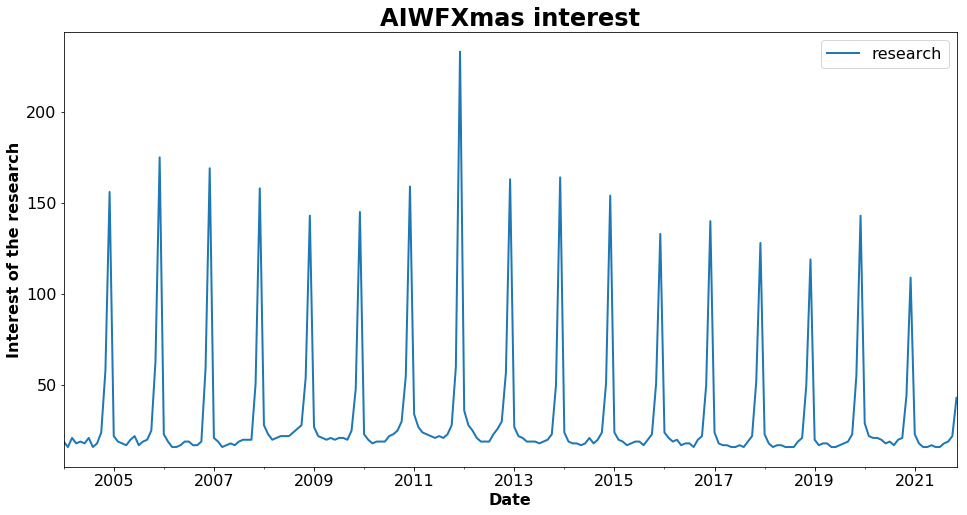

In [17]:
fig = plt.figure(figsize=(19, 7))
dfClean.plot()
plt.title('AIWFXmas interest', fontsize=24)
plt.ylabel('Interest of the research')
plt.xlabel('Date')
plt.show();

The data has a great periodicity once a year : how magical ! Let's dive in the multiple aspect of a TimeSeries dataframe. 

**But what happened in 2012?** I do think the movie 'Switchmas' was released, which earlier titles Ira Finkelstein's Christmas and All I Want Is Christmas.

# SARIMAX model considerations

If you are not familiar with the ARIMA (AutoRegressive Integrated Moving Average) and SARIMAX models, I let you check on the internet the mathematical aspects. Nonetheless, 
**ARIMA, short for ‘AutoRegressive Integrated Moving Average’, is a forecasting algorithm based on the idea that the information in the past values of the time series can alone be used to predict the future values.**

An ARIMA model is characterized by 3 terms: p, d, q where,
1. p is the order of the AutoRegressive term : number of lags of Y to be used as predictors.
2. q is the order of the MovingAverage term :number of lagged forecast errors that should go into the ARIMA Model.
3. d is the number of differencing required to make the time series stationary.


**If a time series, has seasonal patterns, then you need to add seasonal terms and it becomes SARIMA, short for ‘Seasonal ARIMA’.**

We thus have to check on stationnarity, seasonality, tendance etc...

## AR stands for...

... ‘Auto Regressive’. It means that it is a linear regression model that uses its own lags as predictors. Linear regression models, as you know, work best when the predictors are not correlated and are independent of each other.

We can find the d term by analyzing the PACF function. 

## MA stands for ...

... 'Moving Average'. An MA term is technically the error of the lagged forecast.

The ACF tells how many MA terms are required to remove any autocorrelation in the stationarized series.

We can find the q term by analyzing the ACF function. 


# Partial and autocorellation function

## ACF

Autocorrelation is simply the correlation of a series with its own lags. If a series is significantly autocorrelated, that means, the previous values of the series (lags) may be helpful in predicting the current value.

For example, for a 2-period-time lag (like 2 months, 2 days), the value of the function is the Pearson correlation between the 2 values. 

## PACF

Partial autocorrelation can be imagined as the correlation between the series and its lag, after excluding the contributions from the intermediate lags. So, PACF sort of conveys the pure correlation between a lag and the series. That way, you will know if that lag is needed in the AR term or not.

## Plot both functions

In [18]:
def ts_plot(y, lags=None, title=''):
    '''
    Calculate acf, pacf, histogram, and qq plot for a given time series
    '''
    # if time series is not a Series object, make it so
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    
    # initialize figure and axes
    fig = plt.figure(figsize=(14, 12))
    layout = (3, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))
    
    # time series plot
    y.plot(ax=ts_ax)
    #plt.legend(loc='best')
    ts_ax.set_title(title);
    
    # acf and pacf
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5) 
    
    plt.tight_layout();
    plt.show()
    return

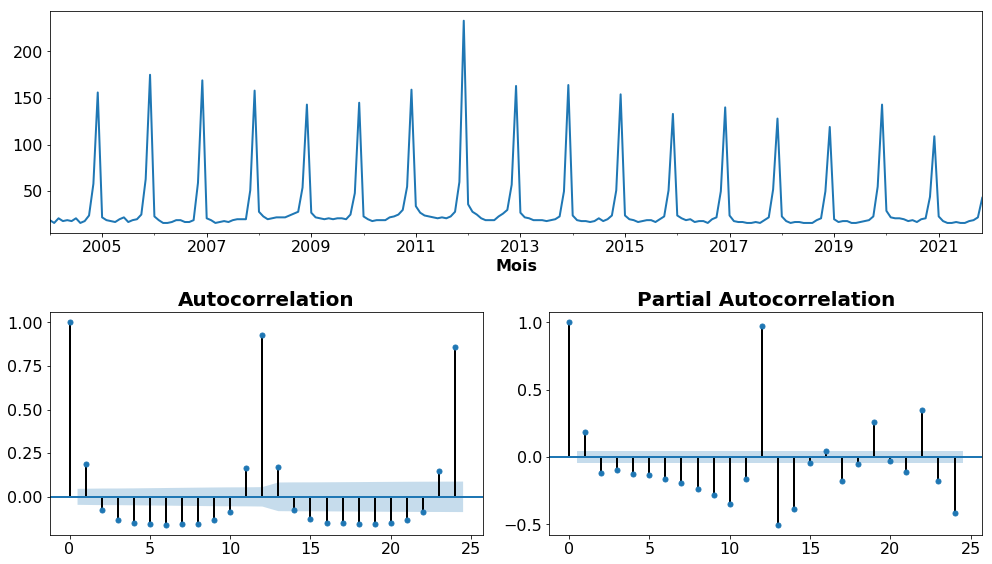

In [19]:
ts_plot(dfClean.research)

As expected, we have the biggest correlation every 12 lags (=12 months).

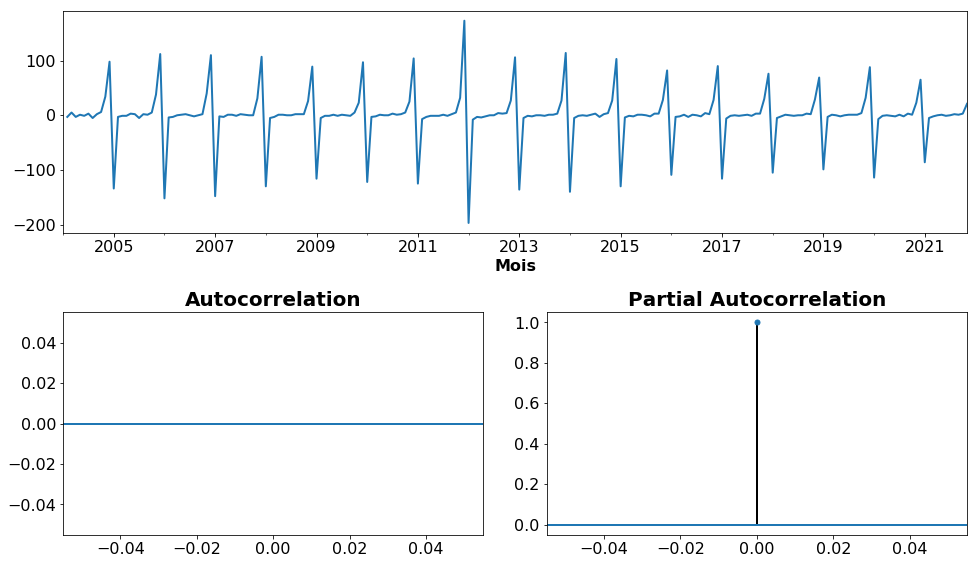

In [20]:
ts_plot(dfClean.research.diff())

We will have to differenciate because an ARIMA (or SARIMA) models work with on stationnary time series. 

# Seasonality

We do expect that we have a pronounced seasonal. To be sure we do have to use a SARIMA model instead an ARIMA one, let's analyze it. 

Seasonality is observed when there is a distinct repeated pattern observed between regular intervals due to seasonal factors.

In [21]:
dfSeason=dfClean.copy()

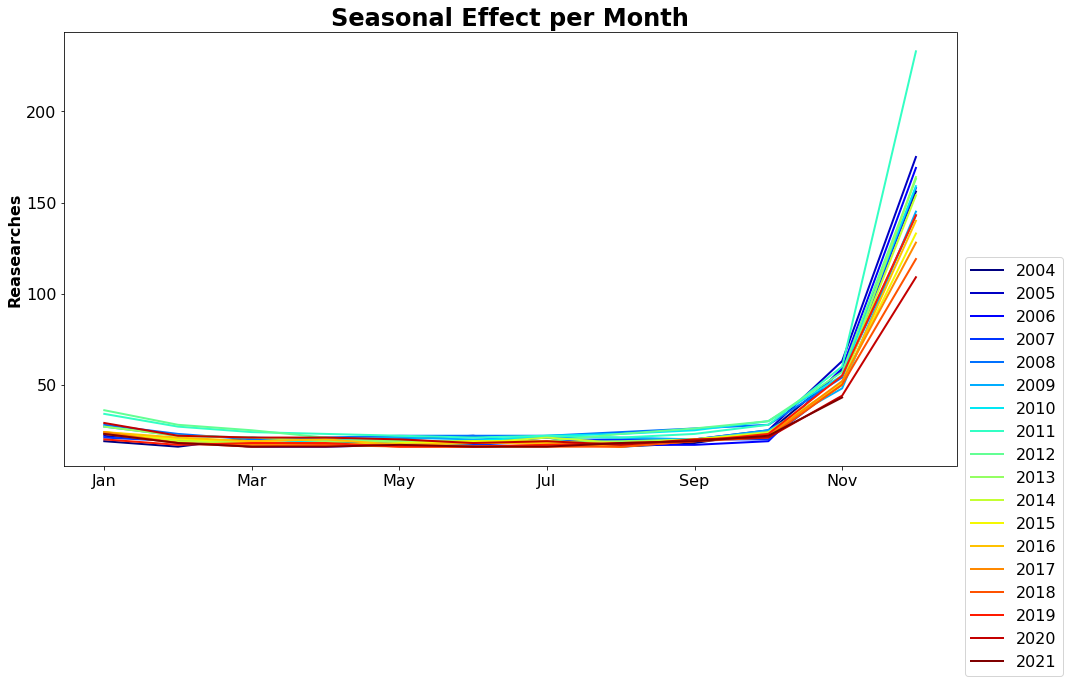

In [22]:
# '%b' extracts the month in locale's abbreviated name from the index
dfSeason['Month'] = dfSeason.index.strftime('%b')
dfSeason['Year'] = dfSeason.index.year
 
# create nice axes names
month_names = pd.date_range(start='2004-01', periods=12, freq='MS').strftime('%b')
 
# reshape data using 'Year' as index and 'Month' as column
dfSeason_piv_line = dfSeason.pivot(index='Month', columns='Year', values='research')
dfSeason_piv_line = dfSeason_piv_line.reindex(index=month_names)
 
# create line plot
dfSeason_piv_line.plot(colormap='jet')
plt.title('Seasonal Effect per Month', fontsize=24)
plt.ylabel('Reasearches')
plt.legend(loc='best', bbox_to_anchor=(1.0, 0.5))
plt.show()

How surprising ! Christmas arrives, and the magic happens. We can without any doubt use a SARIMA model. 

# Computing the model

## Train & test

Let's take back our dfClean df.

In [23]:
dfClean

,research
Mois,
2004-01-01,19
2004-02-01,16
2004-03-01,21
2004-04-01,18
2004-05-01,19
...,...
2021-07-01,16
2021-08-01,18
2021-09-01,19


We have 215 values, we separate our training and test sets with an 80/20 ratio. 

In [24]:
y=dfClean.research

In [26]:
size_train=0.8
train_size = int(len(y) * size_train)
y_train, y_test = y[0:train_size], y[train_size:]

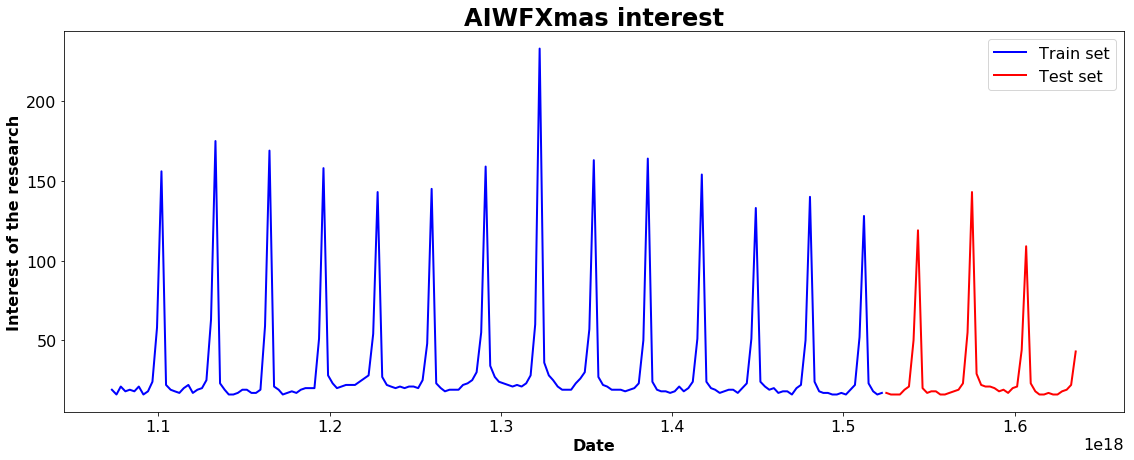

In [31]:
fig = plt.figure(figsize=(19, 7))
plt.plot(y_train, color='b',label='Train set')
plt.plot(y_test, color='r',label='Test set')
plt.legend()
plt.title('AIWFXmas interest', fontsize=24)
plt.ylabel('Interest of the research')
plt.xlabel('Date')
plt.show()

## Finding the best parameters

We could find each parameters of (p,d,q)x(p,d,q,S) by hand, but as we have wunderful tools, let's use them !

## GridSearchCV

We ignore some of the warnings that occur when the function do not converge for example.

In [34]:
import warnings
from statsmodels.tools.sm_exceptions import *
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.simplefilter("ignore", ModelWarning)
warnings.simplefilter("ignore", InvalidTestWarning)

In [35]:
y_train_list=list(y_train.values) #in order to use .append

p = d = q = range(0,3) #p, d, and q can be either 0, 1, or 2
pdq = list(itertools.product(p,d,q)) #gets all possible combinations of p, d, and q 

pdqs = [(c[0], c[1], c[2], 12) for c in pdq]
combs = {}
aics = []

The following loop lasts a lot. 

In [37]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                research   No. Observations:                  172
Model:             SARIMAX(1, 0, 0)x(0, 2, [1, 2], 12)   Log Likelihood                -548.206
Date:                                 Sun, 28 Nov 2021   AIC                           1104.412
Time:                                         19:29:13   BIC                           1116.401
Sample:                                     01-01-2004   HQIC                          1109.283
                                          - 04-01-2018                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2300      0.067      3.436      0.001       0.099       0.361
ma.S.L12      -1.4220     35.704     -0.040      0.968     -71.400      68.556
ma.S.L24       0.4224     15.050      0.028      0.978     -29.076      29.921
sigma2        71.1640   2541.521      0.028      0.978   -4910.125    5052.453
===================================================================================
Ljung-Box (Q):                       13.55   Jarque-Bera (JB):             11010.26
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.13   Skew:                             3.14
Prob(H) (two-sided):                  0.68   Kurtosis:                        44.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Or in other words:

In [ ]:
print("The best combinaison is",combs[best_aic][0])
print("The best seasonal combinaison is",combs[best_aic][1])
print("For an AIC of", best_aic)


#The best combinaison is (1, 0, 0)
#The best seasonal combinaison is (0, 2, 2, 12)
#For an AIC of 1104.411844906986

## Forecasting

In [38]:
best_order=(1,0,0)
best_seasonnal_order=(1, 2, 2, 12)
beginning_prevision=str(y_train.index[-1]) #set to the first of test,but can be a str '2012-11-31-'
end_prevision='2024-12-31'
begin_plot=str(y.index[0])#set to the first of dataset but can be after
label_y='Researches'

In [39]:
# fit model to data
res = sm.tsa.statespace.SARIMAX(y_train,
                                order=best_order,
                                seasonal_order=best_seasonnal_order,
                                enforce_stationarity=True,
                                enforce_invertibility=True).fit()

/Users/oscarmeurer/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:1006: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


In [40]:
# in-sample-prediction and confidence bounds
pred = res.get_prediction(start=pd.to_datetime(beginning_prevision), 
                          end=pd.to_datetime(end_prevision))
pred_ci = pred.conf_int()
forecast=pred.predicted_mean

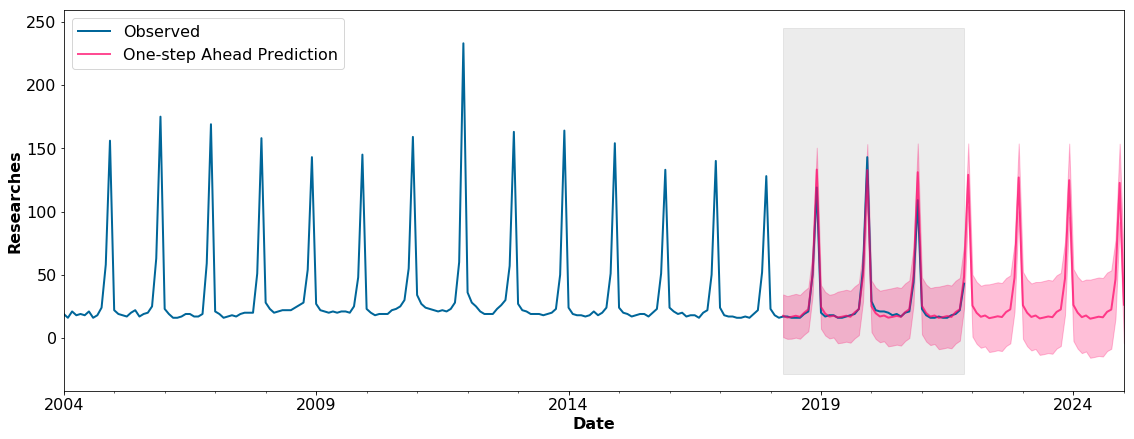

In [41]:
# plot in-sample-prediction
fig = plt.figure(figsize=(19, 7))
ax = y[begin_plot:].plot(label='Observed',color='#006699');
forecast.plot(ax=ax, label='One-step Ahead Prediction', alpha=.7, color='#ff0066');

# draw confidence bound (gray)
ax.fill_between(pred_ci.index, 
                pred_ci.iloc[:, 0], 
                pred_ci.iloc[:, 1], color='#ff0066', alpha=.25);

# style the plot
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime(str(y_train.index[-1])), y.index[-1], alpha=.15, zorder=-1, color='grey');
ax.set_xlabel('Date');
ax.set_ylabel(label_y);
plt.legend(loc='upper left');
plt.show()

# Accuracy Metric

We can judge if our forecast is acceptable with the MAPE, Correlation and Min-Max Error metrics, because they represent the % of errors (contrary to the most common other which are quantities).

In [42]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE

    corr = np.corrcoef(forecast, actual)[0,1]   # corr

    mins = np.amin(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax

    return({'mape':mape, 'corr':corr, 'minmax':minmax})

As the two array must be same sized:

In [94]:
forecastForAccuracy=forecast[:len(y_test)]

In [95]:
forecast_accuracy(forecastForAccuracy, y_test)

{'corr': 0.21814057269619974,
 'mape': 0.08230595516826315,
 'minmax': 0.21534219574782065}

Around 8% MAPE implies the model is about 92% accurate in predicting the next observations.

# Conclusion

Thanks to this notebook and Mariah Carey: 

- we had general insights of the components of a time series (seasonality, stationnarity, etc...) ;
- we get used to the ARIMA & SARIMAX general ideas, parameters ;
- we fitted and predicted values ; 
- we were able to measure the accuracy of our model.

We wish Mariah to enlight our Christmas seasons, and I hope that I didn't put this song in your head too much ! 

***I'm still a student, who loves data. I can only and always recommand you to check the official documentation, and dedicated math books. ;-)***

# References

Other than my university courses and the official documentation :

https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

https://www.kaggle.com/prashant111/arima-model-for-time-series-forecasting

https://medium.com/swlh/a-brief-introduction-to-arima-and-sarima-modeling-in-python-87a58d375def

https://www.machinelearningplus.com/time-series/time-series-analysis-python/